# Lecture 06. Machine Learning with Text Data

Natural Language Processing for Law and Social Science<br>
Elliott Ash, ETH Zurich

In [2]:
# set random seed
import numpy as np
np.random.seed(4)

In [3]:
# set up
import warnings; warnings.simplefilter('ignore')
#%matplotlib notebook
import pandas as pd
df = pd.read_pickle('sc_cases_cleaned.pkl',compression='gzip')
df=df.reset_index(drop=True)
df.head()

,case_name,opinion_type,date_standard,authorship,x_republican,maj_judges,dissent_judges,topic_id,cite_count,opinion_text,year,log_cite_count,preprocessed
0,ERICK CORNELL CLAY v. UNITED STATES,majority,2003-03-04,GINSBURG,0.0,"['BREYER, STEPHEN', 'GINSBURG, RUTH', 'KENNEDY...",[],1.0,2926.0,JUSTICE GINSBURG delivered the opinion of the ...,2003,7.981392,justic ginsburg deliv opinion court motion fed...
1,"HILLSIDE DAIRY INC., A&A DAIRY, L&S DAIRY, AND...",majority,2003-06-09,STEVENS,1.0,"['BREYER, STEPHEN', 'GINSBURG, RUTH', 'KENNEDY...","['THOMAS, CLARENCE']",8.0,117.0,Justice Stevens delivered the opinion of the C...,2003,4.762174,justic steven deliv opinion court unit state i...
2,"CHARLES RUSSELL RHINES v. DOUGLAS WEBER, WARDEN",majority,2005-03-30,O'CONNOR,1.0,"['BREYER, STEPHEN', 'GINSBURG, RUTH', 'KENNEDY...",[],1.0,23364.0,Justice O'Connor delivered the opinion of the ...,2005,10.058952,justic oconnor deliv opinion court confront pr...
3,STATE OF ALASKA v. UNITED STATES OF AMERICA,majority,2005-06-06,KENNEDY,1.0,"['BREYER, STEPHEN', 'GINSBURG, RUTH', 'KENNEDY...","['REHNQUIST, WILLIAM', 'SCALIA, ANTONIN', 'THO...",10.0,84.0,Justice Kennedy delivered the opinion of the C...,2005,4.430817,justic kennedi deliv opinion court state alask...
4,"REGINALD A. WILKINSON, DIRECTOR, OHIO DEPARTME...",majority,2005-06-13,KENNEDY,1.0,"['BREYER, STEPHEN', 'GINSBURG, RUTH', 'KENNEDY...",[],4.0,4230.0,Justice Kennedy delivered the opinion of the C...,2005,8.349957,justic kennedi deliv opinion court case involv...


In [4]:
df = df.assign(authorship_id=(df['authorship']).astype('category').cat.codes)
df['authorship'].value_counts() 

SCALIA       94
GINSBURG     89
THOMAS       87
KENNEDY      86
BREYER       85
STEVENS      79
SOUTER       77
O'CONNOR     52
REHNQUIST    49
ROBERTS      38
ALITO        32
Name: authorship, dtype: int64

array([[<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'log_cite_count'}>]], dtype=object)

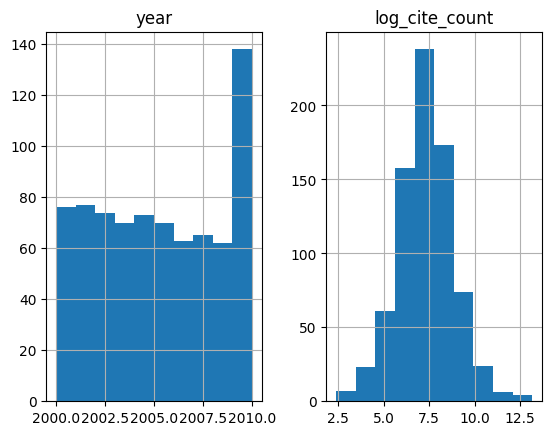

In [5]:
df[['year','log_cite_count']].hist()

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=0.01, # at min 1% of docs
                        max_df=.9,  
                        max_features=10,
                        stop_words='english',
                        ngram_range=(1,3))
X = vectorizer.fit_transform(df['opinion_text'])
words = vectorizer.get_feature_names_out()
print(words)
X

['act' 'claim' 'congress' 'district' 'district court' 'government' 'rule'
 'state' 'statute' 'supra']


<768x10 sparse matrix of type '<class 'numpy.int64'>'
	with 6199 stored elements in Compressed Sparse Row format>

In [7]:
X = X.todense()
X = X / X.sum(axis=1) # counts to frequencies
for i, word in enumerate(words):
    column = X[:,i]
    df['x_'+word] = column
df.head()

,case_name,opinion_type,date_standard,authorship,x_republican,maj_judges,dissent_judges,topic_id,cite_count,opinion_text,...,x_act,x_claim,x_congress,x_district,x_district court,x_government,x_rule,x_state,x_statute,x_supra
0,ERICK CORNELL CLAY v. UNITED STATES,majority,2003-03-04,GINSBURG,0.0,"['BREYER, STEPHEN', 'GINSBURG, RUTH', 'KENNEDY...",[],1.0,2926.0,JUSTICE GINSBURG delivered the opinion of the ...,...,0.125000,0.020833,0.145833,0.104167,0.083333,0.020833,0.145833,0.270833,0.041667,0.041667
1,"HILLSIDE DAIRY INC., A&A DAIRY, L&S DAIRY, AND...",majority,2003-06-09,STEVENS,1.0,"['BREYER, STEPHEN', 'GINSBURG, RUTH', 'KENNEDY...","['THOMAS, CLARENCE']",8.0,117.0,Justice Stevens delivered the opinion of the C...,...,0.192982,0.122807,0.070175,0.035088,0.035088,0.017544,0.000000,0.438596,0.070175,0.017544
2,"CHARLES RUSSELL RHINES v. DOUGLAS WEBER, WARDEN",majority,2005-03-30,O'CONNOR,1.0,"['BREYER, STEPHEN', 'GINSBURG, RUTH', 'KENNEDY...",[],1.0,23364.0,Justice O'Connor delivered the opinion of the ...,...,0.008403,0.000000,0.016807,0.302521,0.235294,0.008403,0.000000,0.327731,0.075630,0.025210
3,STATE OF ALASKA v. UNITED STATES OF AMERICA,majority,2005-06-06,KENNEDY,1.0,"['BREYER, STEPHEN', 'GINSBURG, RUTH', 'KENNEDY...","['REHNQUIST, WILLIAM', 'SCALIA, ANTONIN', 'THO...",10.0,84.0,Justice Kennedy delivered the opinion of the C...,...,0.196078,0.215686,0.078431,0.000000,0.000000,0.009804,0.029412,0.333333,0.019608,0.117647
4,"REGINALD A. WILKINSON, DIRECTOR, OHIO DEPARTME...",majority,2005-06-13,KENNEDY,1.0,"['BREYER, STEPHEN', 'GINSBURG, RUTH', 'KENNEDY...",[],4.0,4230.0,Justice Kennedy delivered the opinion of the C...,...,0.010417,0.041667,0.000000,0.322917,0.302083,0.020833,0.000000,0.208333,0.000000,0.093750


In [8]:
# inspecting data
import numpy as np
features = ['x_'+x for x in words]
cites_features = ['log_cite_count'] + features
df2 = df[cites_features]
corr_matrix = df2.corr()
corr_matrix['log_cite_count'].sort_values(ascending=False)

log_cite_count      1.000000
x_supra             0.184822
x_claim             0.108516
x_rule              0.092011
x_district court    0.071815
x_state             0.065456
x_district          0.052595
x_government       -0.033152
x_statute          -0.102413
x_congress         -0.162694
x_act              -0.261580
Name: log_cite_count, dtype: float64

array([[<AxesSubplot:xlabel='log_cite_count', ylabel='log_cite_count'>,
        <AxesSubplot:xlabel='x_act', ylabel='log_cite_count'>,
        <AxesSubplot:xlabel='x_claim', ylabel='log_cite_count'>,
        <AxesSubplot:xlabel='x_congress', ylabel='log_cite_count'>],
       [<AxesSubplot:xlabel='log_cite_count', ylabel='x_act'>,
        <AxesSubplot:xlabel='x_act', ylabel='x_act'>,
        <AxesSubplot:xlabel='x_claim', ylabel='x_act'>,
        <AxesSubplot:xlabel='x_congress', ylabel='x_act'>],
       [<AxesSubplot:xlabel='log_cite_count', ylabel='x_claim'>,
        <AxesSubplot:xlabel='x_act', ylabel='x_claim'>,
        <AxesSubplot:xlabel='x_claim', ylabel='x_claim'>,
        <AxesSubplot:xlabel='x_congress', ylabel='x_claim'>],
       [<AxesSubplot:xlabel='log_cite_count', ylabel='x_congress'>,
        <AxesSubplot:xlabel='x_act', ylabel='x_congress'>,
        <AxesSubplot:xlabel='x_claim', ylabel='x_congress'>,
        <AxesSubplot:xlabel='x_congress', ylabel='x_congress'>]],
   

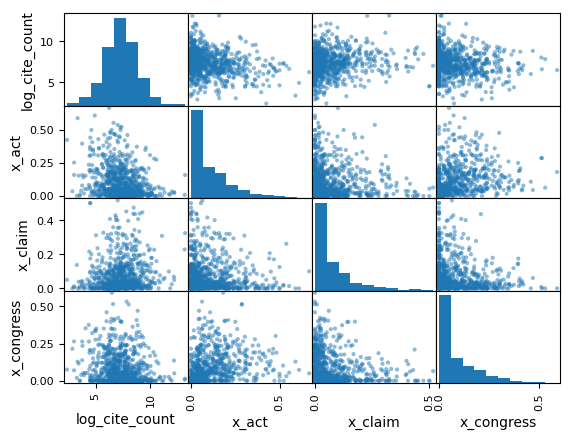

In [9]:
from pandas.plotting import scatter_matrix
scatter_matrix(df2.iloc[:,:4])

<AxesSubplot:xlabel='x_congress', ylabel='log_cite_count'>

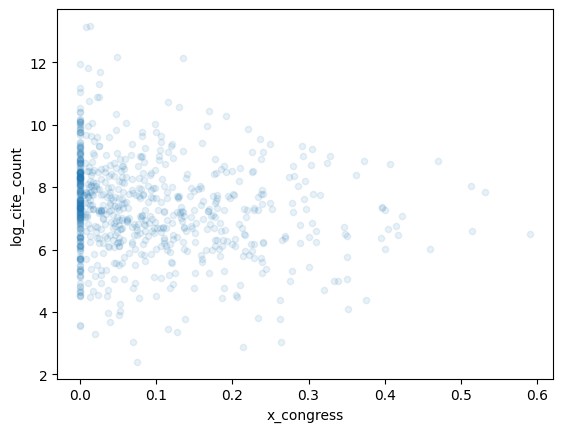

In [10]:
df2.plot(kind='scatter', x='x_congress', y='log_cite_count', alpha = 0.1)

# Regression

**Task:** predict opinions quality using vectorized word frequencies.

In [11]:
# create a test set 
from sklearn.model_selection import train_test_split
train, test = train_test_split(df2, test_size=0.2)

In [12]:
Xtrain = train[features]
Ytrain = train['log_cite_count']
Xtrain.head()

,x_act,x_claim,x_congress,x_district,x_district court,x_government,x_rule,x_state,x_statute,x_supra
596,0.084211,0.168421,0.178947,0.073684,0.052632,0.021053,0.021053,0.147368,0.115789,0.136842
90,0.012048,0.196787,0.000000,0.080321,0.064257,0.020080,0.076305,0.445783,0.000000,0.104418
734,0.222222,0.074074,0.027778,0.027778,0.027778,0.009259,0.462963,0.009259,0.064815,0.074074
694,0.166667,0.060606,0.151515,0.075758,0.060606,0.000000,0.121212,0.196970,0.075758,0.090909
517,0.011364,0.011364,0.000000,0.000000,0.000000,0.000000,0.125000,0.659091,0.034091,0.159091


In [13]:
Ytrain.head()

596    8.449771
90     8.477620
734    6.648985
694    5.236442
517    3.583519
Name: log_cite_count, dtype: float64

In [14]:
# our first machine learning model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

lin_reg.fit(Xtrain, Ytrain)
lin_reg.coef_ 

array([-2.78941967,  0.87813372, -0.76002051, -0.05941102,  1.46336726,
       -0.59654151,  0.057288  , -0.23633569, -0.55910507,  2.6020445 ])

In [15]:
# in-sample performance
from sklearn.metrics import mean_squared_error
Ytrain_pred = lin_reg.predict(Xtrain)        
train_mse = mean_squared_error(Ytrain,Ytrain_pred)
train_mse

2.0767978258929314

In [16]:
# out-of-sample performance
Xtest = test[features]
Ytest = test['log_cite_count']
Ytest_pred = lin_reg.predict(Xtest)        
test_mse = mean_squared_error(Ytest,Ytest_pred)
test_mse

1.9982701593100556

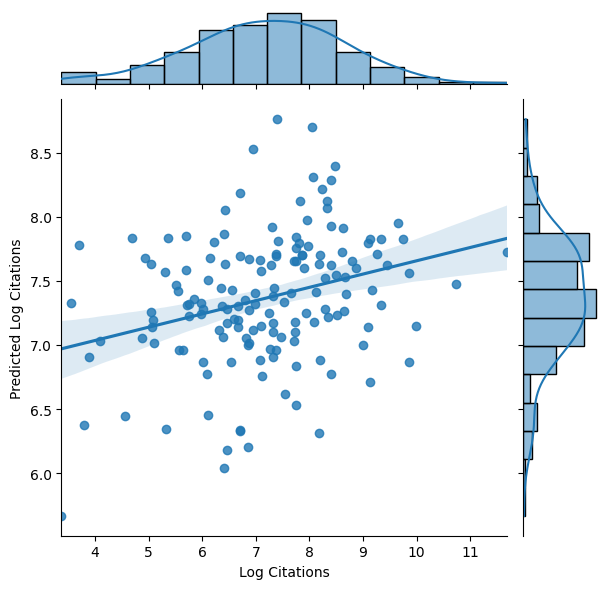

In [17]:
import seaborn as sns

p = sns.jointplot(x=Ytest, y=Ytest_pred, kind='reg')
p.set_axis_labels('Log Citations', 'Predicted Log Citations', fontsize=10)

## Regularization

In [18]:
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.linear_model import LinearRegression

m = 100
x = 6 * np.random.rand(m,1) - 3
y = 0.5 * x ** 2 + x + 2 + np.random.randn(m,1)
y = y.ravel()

from sklearn.preprocessing import PolynomialFeatures
poly_2 = PolynomialFeatures(degree=2) # also adds interactions
X_poly_2 = poly_2.fit_transform(x)


poly_300 = PolynomialFeatures(degree=300) 
X_poly_300 = poly_300.fit_transform(x)


lin_reg = LinearRegression()
cross_val_score(lin_reg, x, y, cv=3, n_jobs=3).mean()

0.5162250278145858

In [19]:
cross_val_score(lin_reg, X_poly_2, y, cv=3, n_jobs=3).mean()

0.8410152890661449

In [20]:
cross_val_score(lin_reg, X_poly_300, y, cv=3, n_jobs=3).mean()

-804022386969305.4

In [21]:
# Lasso
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
cross_val_score(lasso_reg,x,y).mean()

0.4890892829819773

In [22]:
# Lasso
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
cross_val_score(lasso_reg,X_poly_300,y).mean()

-2042.5780430450875

In [23]:
# Ridge
from sklearn.linear_model import Ridge, SGDRegressor
ridge_reg = Ridge(alpha=1)
cross_val_score(ridge_reg,X_poly_300,y).mean()

-168074376.63802156

In [24]:
###
# Elastic Net
###
from sklearn.linear_model import ElasticNetCV
enet_reg = ElasticNetCV(alphas=[.0001, .001, .01,.1,1], 
                        l1_ratio=[.0001, .001, .01,.1,.5,.9, .99, 1])
enet_reg.fit(X_poly_300,y)
enet_reg.alpha_, enet_reg.l1_ratio_

(1.0, 0.01)

In [25]:
cross_val_score(enet_reg,X_poly_300,y).mean()

-2113.7953748647137

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xscale = scaler.fit_transform(df2[features])

Xtrain, Xtest, ytrain, ytest = train_test_split(Xscale, df2['log_cite_count'], test_size=0.2)

from sklearn.linear_model import ElasticNet
enet_reg = ElasticNet(alpha=.1, l1_ratio=.0001)
enet_reg.fit(Xtrain,ytrain)
nonzero = enet_reg.coef_ != 0
print(nonzero.sum(),'non-zero of',len(enet_reg.coef_),'coefficients.')
X_enet = Xscale[:,nonzero]

cross_val_score(enet_reg,X_enet,df2['log_cite_count'],n_jobs=-1).mean()

10 non-zero of 10 coefficients.


0.08481088152016729

# Classification

**Task:** Predict party affiliation with 500 vectorized word frequencies.

In [27]:
# Make a small data set
df = pd.read_pickle('sc_cases_cleaned.pkl',compression='gzip')
df=df.reset_index(drop=True)

from sklearn.feature_extraction.text import CountVectorizer
vectorizer500 = CountVectorizer(min_df=0.01, # at min 1% of docs
                        max_df=.9,  
                        max_features=500,
                        stop_words='english',
                        ngram_range=(1,3))
X500 = vectorizer500.fit_transform(df['opinion_text']).todense()
X500 = X500 / X500.sum(axis=1) # counts to frequencies
X500 = np.array(X500)
vocab = vectorizer500.get_feature_names_out()
for i, word in enumerate(vectorizer500.get_feature_names_out()):
    column = X500[:,i]
    df['x_'+word] = column


features500 = [x for x in df.columns if x.startswith('x_') and x!="x_republican"]
keepcols = ['x_republican'] + features500
df1 = df[keepcols]
y = df1['x_republican']
# set up train/test split
from sklearn.model_selection import train_test_split
train, test = train_test_split(df1, test_size=0.2)
features500 = [x for x in df1.columns if x.startswith('x_') and x!="x_republican"]
df1.head()

,x_republican,x_000,x_10,x_100,x_101,x_102,x_103,x_104,x_104 ct,x_105,...,x_violated,x_violation,x_water,x_way,x_west,x_words,x_work,x_year,x_years,x_york
0,0.0,0.000000,0.000000,0.000000,0.001709,0.001709,0.001709,0.001709,0.001709,0.001709,...,0.000000,0.003419,0.000000,0.001709,0.000000,0.011966,0.000000,0.017094,0.000000,0.0
1,1.0,0.000000,0.002639,0.000000,0.002639,0.000000,0.000000,0.005277,0.002639,0.000000,...,0.002639,0.000000,0.000000,0.000000,0.005277,0.002639,0.000000,0.000000,0.000000,0.0
2,1.0,0.000000,0.000000,0.000000,0.000000,0.014706,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.001634,0.000000,0.001634,0.000000,0.000000,0.000000,0.013072,0.001634,0.0
3,1.0,0.000000,0.003652,0.001461,0.000000,0.000000,0.000730,0.000000,0.000000,0.006574,...,0.000000,0.000000,0.013879,0.002922,0.000000,0.000000,0.000000,0.000730,0.002922,0.0
4,1.0,0.001003,0.002006,0.001003,0.000000,0.000000,0.004012,0.000000,0.000000,0.001003,...,0.002006,0.002006,0.000000,0.000000,0.000000,0.000000,0.001003,0.003009,0.001003,0.0


In [28]:
# Binary Classifier
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(max_iter=10) 
sgd_clf.fit(train[features500], train['x_republican'])
sgd_clf.score(test[features500],test['x_republican']) # accuracy on held-out data

0.7597402597402597

In [29]:
# compare to picking largest category
df1['x_republican'].mean()

0.7734375

In [30]:
from multiprocessing import cpu_count
nthreads = cpu_count() - 1

# Form cross-validated prdictions for all data points
from sklearn.model_selection import cross_val_predict
df1['x_republican_sgd'] = cross_val_predict(sgd_clf,
                                         df1[features500],
                                         df1['x_republican'],
                                         cv=3,
                                         n_jobs=nthreads)

/home/cmarangon/anaconda3/envs/nlp_env_newsp/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/cmarangon/anaconda3/envs/nlp_env_newsp/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/cmarangon/anaconda3/envs/nlp_env_newsp/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


After applying a classifier to a data set with known labels `0` and `1`:

<div class="alert alert-block alert-warning">

<div style="font-size: 150%;"><i class="fa fa-info-circle"></i>&nbsp;Definition</div>
<ul>

<li><strong>TP (true positives)</strong>: labels which were predicted as <code>1</code> and actually are <code>1</code>. <br/><br/>


<li><strong>TN (true negatives)</strong>: labels which were predicted as <code>0</code> and actually are <code>0</code>.<br/><br/>


<li><strong>FP (false positives)</strong>: labels which were predicted as <code>1</code> and actually are <code>0</code>.<br/><br/>


<li><strong>FN (false negatives)</strong>: labels which were predicted as <code>0</code> and actually are <code>1</code>.<br/><br/>

</ul>

To memorize this: 

<ul>

<li>The second word "positives"/"negatives" refers to the prediction computed by the classifier.
<li>The first word "true"/"false" expresses if the classification was correct or not.

</ul>

This is the so called <strong>Confusion Matrix</strong>:

<table style="border: 1px; font-family: 'Source Code Pro', monocco, Consolas, monocco, monospace;
              font-size:110%;">
    <tbody >
        <tr>
            <td style="padding: 10px; background:#f8f8f8;"> </td>
            <td style="padding: 10px; background:#f8f8f8;">Predicted N</td>
            <td style="padding: 10px; background:#f8f8f8;">Predicted P</td>
        </tr>
        <tr>
            <td style="padding: 10px; background:#f8f8f8;">Actual N</td>
            <td style="padding: 10px; background:#fcfcfc; text-align:center; font-weight: bold">TN         </td>
            <td style="padding: 10px; background:#fcfcfc; text-align:center; font-weight: bold">FP         </td>
        </tr>
        <tr>
            <td style="padding: 10px; background:#f8f8f8;">Actual P</td>
            <td style="padding: 10px; background:#fcfcfc; text-align:center; font-weight: bold">FN         </td>
            <td style="padding: 10px; background:#fcfcfc; text-align:center; font-weight: bold">TP         </td>
        </tr>
    </tbody>
</table>

</div>



- So the total number of predictions can be expressed as `TP` + `FP` + `FN` + `TN`.


- The number of correct predictions is `TP` + `TN`.


- `TP` + `FN` is the number of positive examples in our data set, 


- `FP` + `TN` is the number of negative examples.

- **precision** is computed as <code>TP / (TP + FP)</code>.


- **recall** is computed as <code>TP / (TP + FN)</code>.

- The **F1 score** is computed as <code>F1 = 2 * (precision * recall) / (precision + recall)</code>.


<div class="alert alert-block alert-warning">
<div style="font-size: 150%;"><i class="fa fa-info-circle"></i>&nbsp;Definition</div>

This allows us to define <strong>accuracy</strong> as (<code>TP</code> + <code>TN</code>) / (<code>TP</code> + <code>FP</code> + <code>FN</code> + <code>TN</code>).

</div>

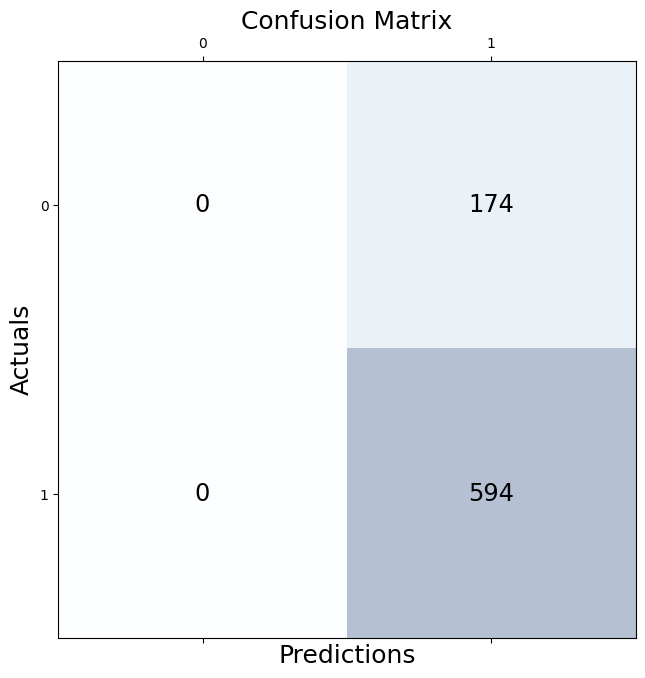

In [31]:
# Construct confusion matrix
from sklearn.metrics import confusion_matrix, confusion_matrix
import matplotlib.pyplot as plt
conf_matrix =confusion_matrix(df1['x_republican'], df1['x_republican_sgd'])

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [32]:
# Precision and Recall
from sklearn.metrics import precision_score, recall_score
print('Precision:',precision_score(df1['x_republican'], df1['x_republican_sgd']))
print('Recall:',recall_score(df1['x_republican'], df1['x_republican_sgd']))

Precision: 0.7734375
Recall: 1.0


In [33]:
#F1 score
from sklearn.metrics import f1_score
f1_score(df1['x_republican'],df1['x_republican_sgd'])

0.8722466960352423

### Precision/Recall Trade Off

(array([  2.,  13.,  86., 199., 286., 136.,  34.,   9.,   2.,   1.]),
 array([0.24988051, 0.45119875, 0.65251698, 0.85383522, 1.05515345,
        1.25647169, 1.45778992, 1.65910816, 1.86042639, 2.06174463,
        2.26306286]),
 <BarContainer object of 10 artists>)

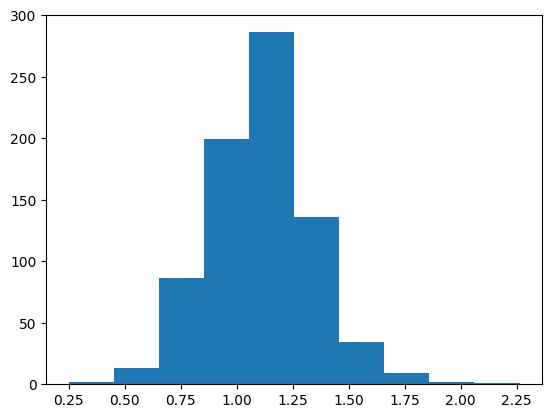

In [34]:
# scores used by SGDClassifier
import matplotlib.pyplot as plt

y_scores = sgd_clf.decision_function(df[features500])
plt.hist(y_scores) # histogram of scores

In [35]:
# prediction using default threshold ... 
threshold = 0
(y_scores > threshold).mean()

1.0

In [36]:
# ... gives default model prediction
ypred = sgd_clf.predict(df[features500])
ypred.mean()

1.0

In [37]:
# increasing threshold means more zeros are predicted
threshold = 1
(y_scores > threshold).mean()

0.7083333333333334

/home/cmarangon/anaconda3/envs/nlp_env_newsp/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/cmarangon/anaconda3/envs/nlp_env_newsp/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/cmarangon/anaconda3/envs/nlp_env_newsp/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


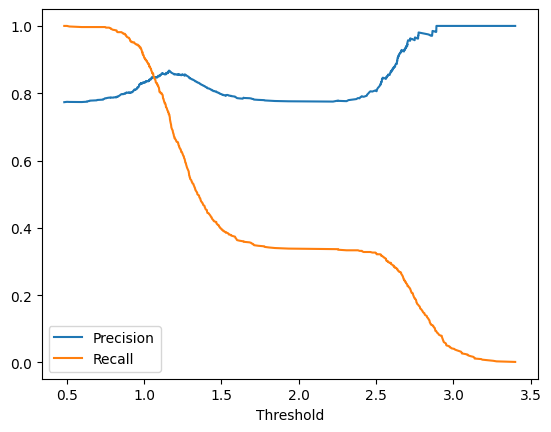

In [38]:
# Visualizing the precision/recall tradeoff
y_scores = cross_val_predict(sgd_clf,
                             df1[features500],
                             df1['x_republican'],
                             cv=3,
                             method='decision_function',
                             n_jobs=3)

from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(df1['x_republican'], y_scores)

import matplotlib.pyplot as plt
plt.plot(thresholds, precisions[:-1], label="Precision")
plt.plot(thresholds, recalls[:-1], label="Recall")
plt.xlabel('Threshold')
plt.legend()

Text(0, 0.5, 'Precision')

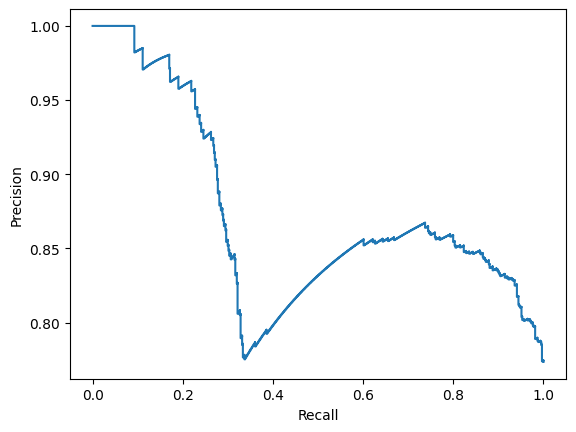

In [39]:
# Plot precision vs recall
plt.step(recalls, precisions)
plt.xlabel('Recall')
plt.ylabel('Precision')

In [40]:
# Assessing other scoring thresholds
ypred_lower = y_scores > -1
ypred_higher = y_scores > 1

print('Precision for Low Threshold:',precision_score(y, ypred_lower))
print('Precision for High Threshold:',precision_score(y, ypred_higher))
print('Recall for Low Threshold:',recall_score(y, ypred_lower))
print('Recall for High Threshold:',recall_score(y, ypred_higher))

Precision for Low Threshold: 0.7734375
Precision for High Threshold: 0.8315301391035549
Recall for Low Threshold: 1.0
Recall for High Threshold: 0.9057239057239057


Text(0, 0.5, 'True Positive Rate')

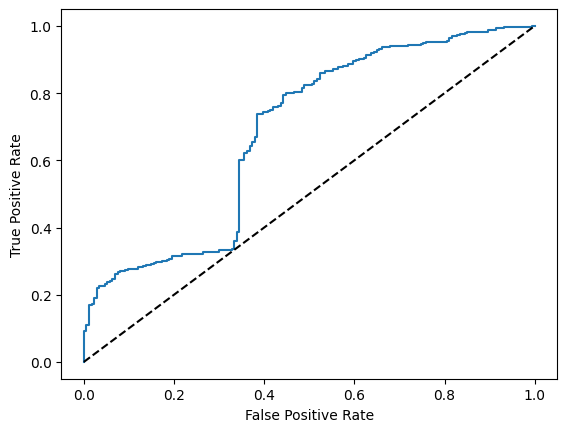

In [41]:
# ROC Curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y, y_scores)
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [42]:
# AUC
from sklearn.metrics import roc_auc_score
roc_auc_score(y, y_scores)

0.684072526026549

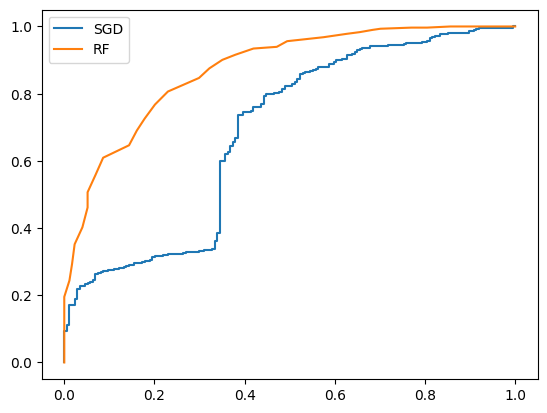

In [43]:
# Random Forests and predict_proba()

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
y_probas_rfc = cross_val_predict(rfc,
                                 X500,
                                 y,
                                 cv=3,
                                 method='predict_proba',
                                 n_jobs=3)

y_scores_rfc = y_probas_rfc[:,1]
fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(y,y_scores_rfc) 

# compare precision/recall tradeoff for SGD and RF classifiers
plt.plot(fpr, tpr, label="SGD")
plt.plot(fpr_rfc, tpr_rfc, label="RF")
plt.legend()

In [44]:
roc_auc_score(y,y_scores_rfc)

0.8717636131429235

## Multinomial Classification

**Task:** Predict authorship using word frequencies

In [45]:
sgd_clf = SGDClassifier(max_iter=10) 

author = df['authorship']
authpred = cross_val_predict(sgd_clf,
                              X500,
                              author,
                              cv=7)
print((authpred == author).mean())
list(zip(author[:8],authpred[:8]))

0.23177083333333334


[('GINSBURG', 'GINSBURG'),
 ('STEVENS', 'BREYER'),
 ("O'CONNOR", 'KENNEDY'),
 ('KENNEDY', 'ALITO'),
 ('KENNEDY', 'KENNEDY'),
 ('SOUTER', 'SCALIA'),
 ('BREYER', 'BREYER'),
 ('GINSBURG', 'SCALIA')]

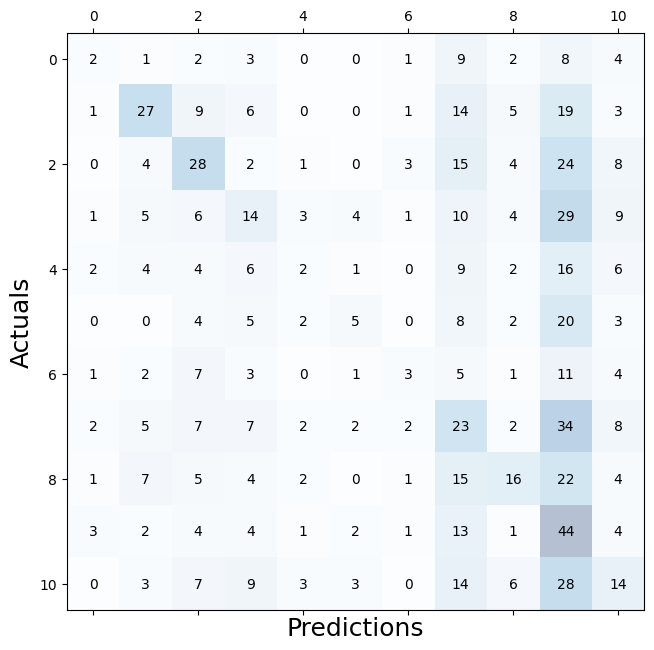

In [46]:
# Multi-class confusion matrix
conf_matrix = confusion_matrix(author,authpred)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center',  fontsize=10)
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.show()

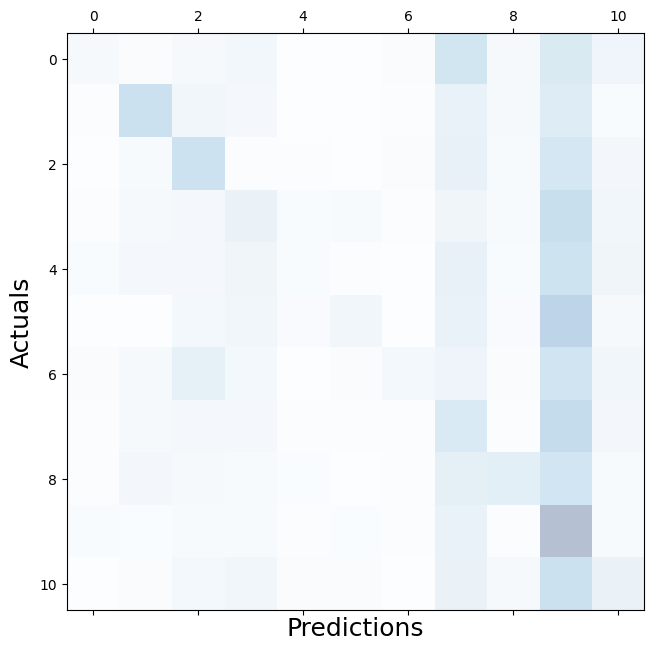

In [47]:
# normalize colors
conf_matrix_norm = conf_matrix / conf_matrix.sum(axis=1, keepdims=True)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix_norm, cmap=plt.cm.Blues, alpha=0.3)
# for i in range(conf_matrix_norm.shape[0]):
#     for j in range(conf_matrix_norm.shape[1]):
#         ax.text(x=j, y=i,s=conf_matrix_norm[i, j], va='center', ha='center',  fontsize=10)
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.show()

## Multinomial Logistic

In [48]:

from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(C=1, # default L2 penalty # .01, .1, 1, 2, 10
                              class_weight='balanced')

scores = cross_val_score(logistic,
                         Xscale,
                         author,
                         cv=3)

scores.mean(), scores.std()

(0.18359375, 0.008438464451051902)

# Ensemble Learning

**Task:** Predict if citations are above average using word frequencies and authorship

In [49]:
#create id variable for authorship
df = df.assign(authorship_id=(df['authorship']).astype('category').cat.codes)
df[['authorship','authorship_id']].drop_duplicates().sort_values('authorship_id')

,authorship,authorship_id
14,ALITO,0
6,BREYER,1
0,GINSBURG,2
3,KENNEDY,3
2,O'CONNOR,4
55,REHNQUIST,5
12,ROBERTS,6
20,SCALIA,7
5,SOUTER,8
1,STEVENS,9


In [50]:
# missing values
df['authorship_id'].fillna(0,inplace=True)

In [51]:
df2

,log_cite_count,x_act,x_claim,x_congress,x_district,x_district court,x_government,x_rule,x_state,x_statute,x_supra
0,7.981392,0.125000,0.020833,0.145833,0.104167,0.083333,0.020833,0.145833,0.270833,0.041667,0.041667
1,4.762174,0.192982,0.122807,0.070175,0.035088,0.035088,0.017544,0.000000,0.438596,0.070175,0.017544
2,10.058952,0.008403,0.000000,0.016807,0.302521,0.235294,0.008403,0.000000,0.327731,0.075630,0.025210
3,4.430817,0.196078,0.215686,0.078431,0.000000,0.000000,0.009804,0.029412,0.333333,0.019608,0.117647
4,8.349957,0.010417,0.041667,0.000000,0.322917,0.302083,0.020833,0.000000,0.208333,0.000000,0.093750
...,...,...,...,...,...,...,...,...,...,...,...
763,7.119636,0.000000,0.008696,0.000000,0.682609,0.208696,0.000000,0.000000,0.052174,0.000000,0.047826
764,8.045588,0.133803,0.035211,0.021127,0.042254,0.021127,0.028169,0.176056,0.260563,0.176056,0.105634
765,8.514389,0.136364,0.034091,0.227273,0.045455,0.034091,0.034091,0.034091,0.079545,0.238636,0.136364
766,6.601230,0.167598,0.005587,0.139665,0.229050,0.195531,0.067039,0.000000,0.000000,0.156425,0.039106


In [52]:
# Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(df2[features])
feat_scaled = pd.DataFrame(X,columns=features)

feat_scaled.head()

,x_act,x_claim,x_congress,x_district,x_district court,x_government,x_rule,x_state,x_statute,x_supra
0,0.133934,-0.583756,0.579275,0.080505,0.213363,-0.477066,0.396905,0.257236,-0.458085,-0.511424
1,0.710225,0.497245,-0.151849,-0.592319,-0.455040,-0.505043,-0.729197,1.051051,-0.194249,-0.788551
2,-0.854463,-0.804605,-0.667580,2.012463,2.318651,-0.582785,-0.729197,0.526462,-0.143768,-0.700480
3,0.736470,1.481837,-0.072067,-0.934071,-0.941150,-0.570873,-0.502084,0.552971,-0.662229,0.361453
4,-0.837396,-0.362906,-0.829993,2.211115,3.243959,-0.477066,-0.729197,-0.038499,-0.843690,0.086919


In [53]:
# Encoding categorical variables
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
judge = df['authorship_id']
judge_fes = encoder.fit_transform(judge.values.reshape(-1,1))
judge_ids = ['j_'+str(x) for x in range(len(judge.unique()))]
judge_fes = pd.DataFrame(judge_fes.todense(),columns=judge_ids)
df = df.rename(columns={'x_republican':'republican'})
df_scaled = pd.concat([df2['log_cite_count'],feat_scaled,judge_fes, df['republican']],axis=1)
train, test = train_test_split(df_scaled, test_size=0.2)

In [54]:
df_scaled.head()

,log_cite_count,x_act,x_claim,x_congress,x_district,x_district court,x_government,x_rule,x_state,x_statute,...,j_2,j_3,j_4,j_5,j_6,j_7,j_8,j_9,j_10,republican
0,7.981392,0.133934,-0.583756,0.579275,0.080505,0.213363,-0.477066,0.396905,0.257236,-0.458085,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.762174,0.710225,0.497245,-0.151849,-0.592319,-0.455040,-0.505043,-0.729197,1.051051,-0.194249,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,10.058952,-0.854463,-0.804605,-0.667580,2.012463,2.318651,-0.582785,-0.729197,0.526462,-0.143768,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4.430817,0.736470,1.481837,-0.072067,-0.934071,-0.941150,-0.570873,-0.502084,0.552971,-0.662229,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,8.349957,-0.837396,-0.362906,-0.829993,2.211115,3.243959,-0.477066,-0.729197,-0.038499,-0.843690,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [55]:
Y = df_scaled['log_cite_count']>df_scaled['log_cite_count'].mean()
predictors = df_scaled[features + judge_ids]
# Bagging classifier

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
        DecisionTreeClassifier(), n_estimators=50,
        max_samples=100, bootstrap=True)

cross_val_score(bag_clf, predictors, Y).mean()

0.6133435192258722

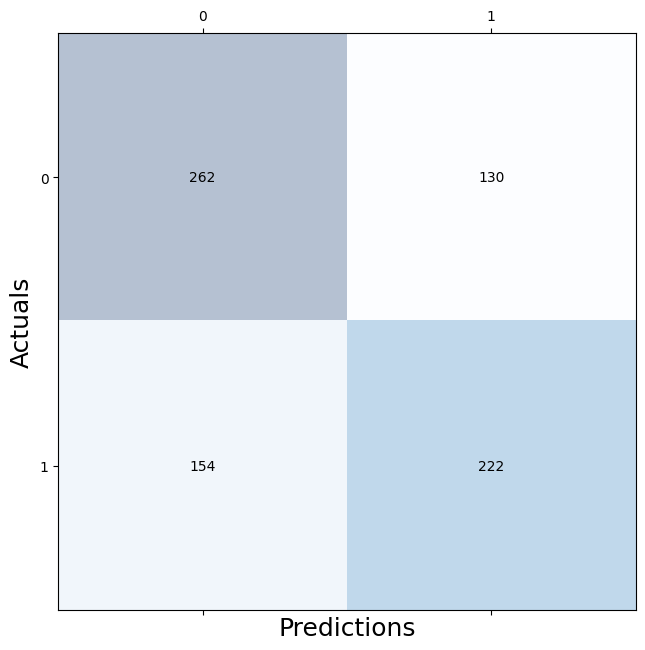

In [56]:
# random forest
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=500, 
                                 max_leaf_nodes=16)
y_pred_rf = cross_val_predict(rnd_clf, predictors, Y)                              
conf_matrix = confusion_matrix(Y,y_pred_rf)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center',  fontsize=10)
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.show()

In [57]:
rnd_clf.fit(predictors,Y)
feature_importances = rnd_clf.feature_importances_
sorted(zip(feature_importances, words), reverse=False)

[(0.04612632482497018, 'government'),
 (0.05758929182340209, 'district court'),
 (0.05999580735657496, 'district'),
 (0.08501113256838287, 'rule'),
 (0.09355708805285838, 'claim'),
 (0.09408636373575235, 'statute'),
 (0.09521622882292945, 'state'),
 (0.10666556798203881, 'congress'),
 (0.1269495140432754, 'supra'),
 (0.1688175664491011, 'act')]

In [58]:
# XGBoost
from xgboost import XGBClassifier, XGBRegressor

xgb_clf = XGBClassifier()
cross_val_score(xgb_clf, predictors, Y).mean()

0.576750700280112

In [59]:
xgb_clf.fit(predictors,Y)
sorted(zip(xgb_clf.feature_importances_, words),reverse=True)[:10]

[(0.043348826, 'act'),
 (0.042095475, 'congress'),
 (0.038386073, 'claim'),
 (0.037856974, 'supra'),
 (0.036377568, 'state'),
 (0.035642907, 'district court'),
 (0.035597205, 'statute'),
 (0.03259114, 'government'),
 (0.030158265, 'rule'),
 (0.027722644, 'district')]

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

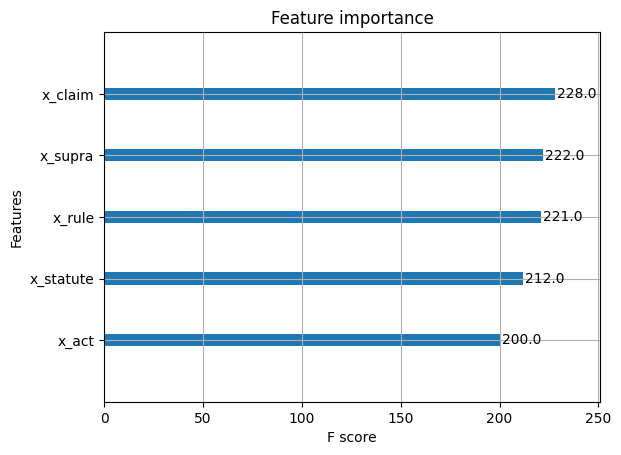

In [60]:
from xgboost import plot_importance
plot_importance(xgb_clf, max_num_features=5)

# Pipelines and Cross-Validation

**Task:** Predict party affiliation using using vectorized word frequencies

In [61]:
# Cross-validation
from sklearn.ensemble import RandomForestClassifier
forest_reg = RandomForestClassifier()

from sklearn.model_selection import cross_val_score
scores = cross_val_score(forest_reg,
                         df_scaled[features],
                         df_scaled['republican'],
                         cv=3)

# the default score for random forest reg is negative MSE.
print(np.abs(scores.mean()),scores.std())

0.7565104166666666 0.0048719497223619025


In [62]:
# Grid Search
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [3, 10, 30],
              'max_features': [2, 4],
              'bootstrap': [True, False]}

grid_search = GridSearchCV(forest_reg, 
                           param_grid, 
                           cv=3)              
grid_search.fit(df_scaled[features],df_scaled['republican'])

print(grid_search.best_params_)
print(np.abs(grid_search.best_score_))

{'bootstrap': True, 'max_features': 4, 'n_estimators': 30}
0.7473958333333334


In [63]:
from sklearn.model_selection import RandomizedSearchCV
rand_search = RandomizedSearchCV(forest_reg, param_grid, cv=3)              
rand_search.fit(df_scaled[features],df_scaled['republican'])

print(rand_search.best_params_)
print(np.abs(rand_search.best_score_))

{'n_estimators': 30, 'max_features': 2, 'bootstrap': True}
0.7643229166666666


In [64]:
# Saving and loading
import joblib
joblib.dump(forest_reg,'forest_reg.pkl') # will overwrite local files
forest_reg = joblib.load('forest_reg.pkl')

In [65]:

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('forest_reg', RandomForestClassifier()),
])

parameters = {
    'vect__max_df': (0.5, 0.75, 1.0),
    'vect__max_features': (2, 4, 8, 10, 16),
    'forest_reg__n_estimators': [3, 10, 30],
    'forest_reg__max_features': [2, 4],
    'forest_reg__bootstrap': [True, False]}

In [68]:
from pprint import pprint
from time import time

if __name__ == "__main__":
    # multiprocessing requires the fork to happen in a __main__ protected
    # block

    # find the best parameters for both the feature extraction and the
    # classifier
    grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1)

    print("Performing grid search...")
    print("pipeline:", [name for name, _ in pipeline.steps])
    print("parameters:")
    pprint(parameters)
    t0 = time()
    grid_search.fit(df.opinion_text, df.republican)
    print("done in %0.3fs" % (time() - t0))
    print()

    print("Best score: %0.3f" % grid_search.best_score_)
    print("Best parameters set:")
    best_parameters = grid_search.best_estimator_.get_params()
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

Performing grid search...
pipeline: ['vect', 'tfidf', 'forest_reg']
parameters:
{'forest_reg__bootstrap': [True, False],
 'forest_reg__max_features': [2, 4],
 'forest_reg__n_estimators': [3, 10, 30],
 'vect__max_df': (0.5, 0.75, 1.0),
 'vect__max_features': (2, 4, 8, 10, 16)}
Fitting 5 folds for each of 180 candidates, totalling 900 fits
done in 782.344s

Best score: 0.802
Best parameters set:
	forest_reg__bootstrap: True
	forest_reg__max_features: 2
	forest_reg__n_estimators: 30
	vect__max_df: 1.0
	vect__max_features: 16


## Nested Cross-Validation

In [70]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor

n = 30

forest_reg = RandomForestRegressor()
non_nested_scores = np.zeros(n)
nested_scores = np.zeros(n)


param_grid = {'n_estimators': [3, 10, 30],
              'max_features': [2, 4],
              'bootstrap': [True, False]}

for i in range(n):

    # Choose cross-validation techniques for the inner and outer loops,

    inner_cv = KFold(n_splits=4, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=4, shuffle=True, random_state=i)

    # Non_nested parameter search and scoring
    grid_search = GridSearchCV(estimator=forest_reg, param_grid=param_grid, cv=inner_cv)
    grid_search.fit(Xtrain, Ytrain)
    non_nested_scores[i] = grid_search.best_score_

    # Nested CV with parameter optimization
    nested_score = cross_val_score(grid_search, X=Xtrain, y=Ytrain, cv=outer_cv)
    nested_scores[i] = nested_score.mean()

score_difference = non_nested_scores - nested_scores
print("Average difference of {:6f} with std. dev. of {:6f}."
      .format(score_difference.mean(), score_difference.std()))


Average difference of 0.013760 with std. dev. of 0.018452.
